In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Understanding the digits data set

* First load the digits data set and look at the contents

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

* See the "shape" of the data set, how many samples? How many features?

In [6]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


* What is the representation of an image?

In [7]:
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


## Fitting a model

* First we split our data into "training" and "test" data sets.

The Xtrain data will be used to fit a model.  The Xtest data will be used to test the model and determine how well the model generalizes to data it hasn't seen.

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,digits.target,random_state=5)
print(Xtrain.shape, Xtest.shape)

((1347, 64), (450, 64))


* Fit the model to the training data

We use the Xtrain features and the ytrain labels to fit our model.  Then we use Xtest to make some predictions.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

myLDA = LDA(solver='eigen', shrinkage='auto')
myLDA.fit(Xtrain, ytrain)
ypred = myLDA.predict(Xtest)

/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


## Assess Model Performance

We can use `accuracy_score` to compare the labels from the test data set to the predictions from our fitted model.

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9555555555555556

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  2 40  0  2  0  0  1  2]
 [ 0  1  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  0 53  0  0  0  2]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  1]
 [ 0  1  0  1  0  0  0  1 37  1]
 [ 0  0  0  0  0  1  0  0  2 38]]


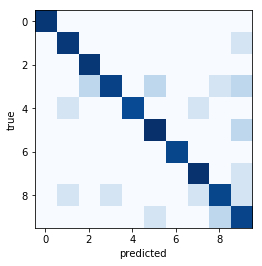

In [12]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)+1),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

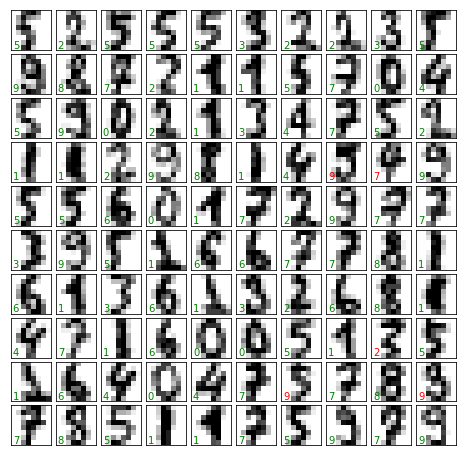

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

## Let's Compare with Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
myLR = LogisticRegression(penalty='l2')
myLR.fit(Xtrain, ytrain)
ypred = myLR.predict(Xtest)

* Let's have a look at the same diagnostics we used for LDA

In [15]:
accuracy_score(ytest, ypred)

0.95999999999999996

In [16]:
print(confusion_matrix(ytest, ypred))

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 45  1  1  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  1  0]
 [ 0  1  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  1 52  0  0  0  2]
 [ 0  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  0  0  0  0 51  0  1]
 [ 0  2  0  0  0  0  0  0 38  1]
 [ 0  0  0  0  0  1  0  0  2 38]]


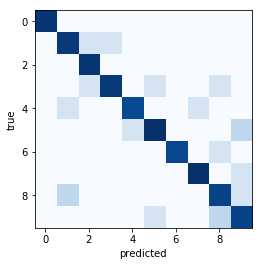

In [17]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)+1),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

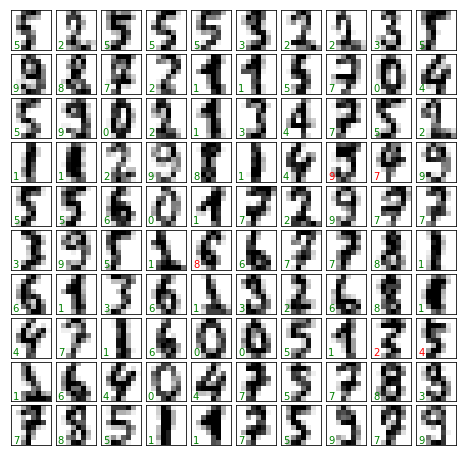

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])